# 📊 Superstore Sales Analysis using Python and SQLite

In this project, we perform an end-to-end data analysis of Superstore sales using Python, SQLite, and visualization libraries. We'll clean the data, store it in a local SQL database, run SQL queries for insights, and visualize the results with Seaborn and Matplotlib.

---


##  Step 1: Import Required Libraries

We start by importing the necessary libraries for data handling (`pandas`), SQL integration (`sqlite3`), and data visualization (`matplotlib` and `seaborn`).


In [44]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

##  Step 2: Load the Superstore Dataset

We read the Superstore sales CSV file and perform a basic inspection using `.head()` and `.info()` to understand the structure and data types.


In [3]:
df =pd.read_csv("superstore_sales_dataset.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Order Year,Order Month,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,2016,11,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,08-11-2016,11-11-2016,2016,11,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,12-06-2016,16-06-2016,2016,6,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,11-10-2015,18-10-2015,2015,10,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,11-10-2015,18-10-2015,2015,10,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Order Year     9994 non-null   int64  
 5   Order Month    9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   Customer ID    9994 non-null   object 
 8   Customer Name  9994 non-null   object 
 9   Segment        9994 non-null   object 
 10  Country        9994 non-null   object 
 11  City           9994 non-null   object 
 12  State          9994 non-null   object 
 13  Postal Code    9994 non-null   int64  
 14  Region         9994 non-null   object 
 15  Product ID     9994 non-null   object 
 16  Category       9994 non-null   object 
 17  Sub-Category   9994 non-null   object 
 18  Product 

## Step 3: Convert 'Order Date' Column to Datetime

The `Order Date` column is currently in text format. We convert it to `datetime` format using `pd.to_datetime()` with `dayfirst=True` to match the format in the dataset.


In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Order Year     9994 non-null   int64         
 5   Order Month    9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

##  Step 4: Create SQLite Database and Load Data

We create a new SQLite database and load the DataFrame into a table named `superstore` using `to_sql()`. This allows us to run SQL queries on the data.


In [7]:
conn = sqlite3.connect('superstore_sales.db')
df.to_sql('superstore', conn, if_exists='replace', index=False)

9994

## Step 5: Total Sales and Profit by Category and Sub-Category

This SQL query calculates the total sales and total profit grouped by both `Category` and `Sub-Category`. Results are sorted by highest total sales.


In [25]:
query1 = """
SELECT 
Category, "Sub-Category", SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
FROM superstore
GROUP BY Category, "Sub-Category"
ORDER BY Total_Sales DESC;
"""
df_cat = pd.read_sql_query(query1,conn)
df_cat

,Category,Sub-Category,Total_Sales,Total_Profit
0,Technology,Phones,330007.10,44516.25
1,Furniture,Chairs,328449.13,26590.15
2,Office Supplies,Storage,223843.59,21279.05
3,Furniture,Tables,206965.68,-17725.59
4,Office Supplies,Binders,203412.77,30221.64
5,Technology,Machines,189238.68,3384.73
6,Technology,Accessories,167380.31,41936.78
7,Technology,Copiers,149528.01,55617.90
8,Furniture,Bookcases,114880.05,-3472.56
9,Office Supplies,Appliances,107532.14,18138.07


## Step 6: Region-wise Sales, Profit, and Profit Margin

We analyze performance by region by calculating:
- Total Sales
- Total Profit
- Profit Margin (%)  
Regions are sorted by profit margin in descending order.


In [28]:
query2 = """
SELECT Region, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit, 
       (SUM(Profit) / SUM(Sales)) * 100 AS Profit_Margin_Percentage
FROM superstore
GROUP BY Region
ORDER BY Profit_Margin_Percentage DESC;
"""
df_region = pd.read_sql_query(query2,conn)
df_region

,Region,Total_Sales,Total_Profit,Profit_Margin_Percentage
0,West,725457.93,108418.79,14.944876
1,East,678781.36,91522.84,13.483405
2,South,391721.90,46749.71,11.934413
3,Central,501239.88,39706.45,7.921646


##  Step 7: Segment-wise Sales Distribution

This query groups total sales by customer `Segment` to identify which segments drive the most revenue.


In [34]:
query3 = """
SELECT Segment, SUM(Sales) AS Total_Sales
FROM superstore
GROUP BY Segment
ORDER BY Total_Sales DESC;
"""
df_segment = pd.read_sql_query(query3,conn)
df_segment

,Segment,Total_Sales
0,Consumer,1161401.34
1,Corporate,706146.44
2,Home Office,429653.29


##  Step 8: Monthly Sales Trend by Category

We extract the `YYYY-MM` from `Order Date` and group the sales by both month and category. This helps us analyze seasonality and category trends over time.


In [36]:
query4 = """
SELECT strftime('%Y-%m', "Order Date") AS Month, Category, SUM(Sales) AS Monthly_Sales
FROM superstore
GROUP BY Month, Category
ORDER BY Month, Category;
"""
df_monthly = pd.read_sql_query(query4,conn)
df_monthly

,Month,Category,Monthly_Sales
0,2014-01,Furniture,6242.53
1,2014-01,Office Supplies,4851.08
2,2014-01,Technology,3143.29
3,2014-02,Furniture,1839.66
4,2014-02,Office Supplies,1071.75
...,...,...,...
139,2017-11,Office Supplies,31472.31
140,2017-11,Technology,49918.77
141,2017-12,Furniture,31407.45
142,2017-12,Office Supplies,30436.92


## Step 9: States with High Sales-Profit Gap

This query shows states where the difference between sales and profit is more than ₹1000. Sorting is done by the largest difference to highlight inefficiencies.


In [42]:
query5 = """
SELECT State, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit, 
       (SUM(Sales) - SUM(Profit)) AS Sales_To_Profit_Difference
FROM superstore
GROUP BY State
HAVING Sales_To_Profit_Difference > 1000
ORDER BY Sales_To_Profit_Difference DESC;
"""
df_state = pd.read_sql_query(query5,conn)
df_state

,State,Total_Sales,Total_Profit,Sales_To_Profit_Difference
0,California,457687.68,76381.60,381306.08
1,New York,310876.20,74038.64,236837.56
2,Texas,170187.98,-25729.29,195917.27
3,Pennsylvania,116512.02,-15560.04,132072.06
4,Washington,138641.29,33402.70,105238.59
5,Ohio,78258.21,-16971.37,95229.58
6,Florida,89473.73,-3399.25,92872.98
7,Illinois,80166.16,-12607.89,92774.05
8,North Carolina,55603.09,-7490.81,63093.90
9,Virginia,70636.72,18598.00,52038.72


## Visualization 1: Sales by Sub-Category and Category

We use a bar plot to visualize total sales for each sub-category, grouped and color-coded by category. This helps identify which sub-categories perform best.


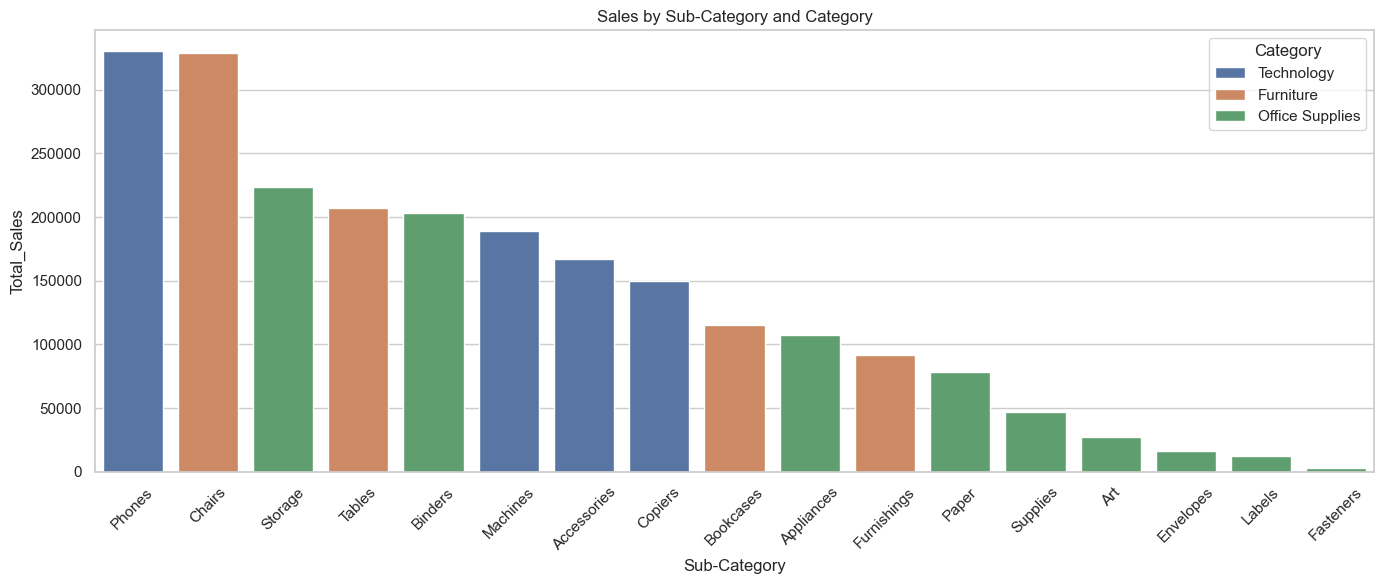

In [45]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_cat, x="Sub-Category", y="Total_Sales", hue="Category")
plt.title("Sales by Sub-Category and Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Sales by Sub-Category and Category.png")
plt.show()

##  Visualization 2: Profit Margin (%) by Region

This bar chart displays profit margins across different regions to highlight regional efficiency in sales and profitability.


C:\Users\soura\AppData\Local\Temp\ipykernel_11172\563947615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_region, x="Region", y="Profit_Margin_Percentage", palette="Blues_d")


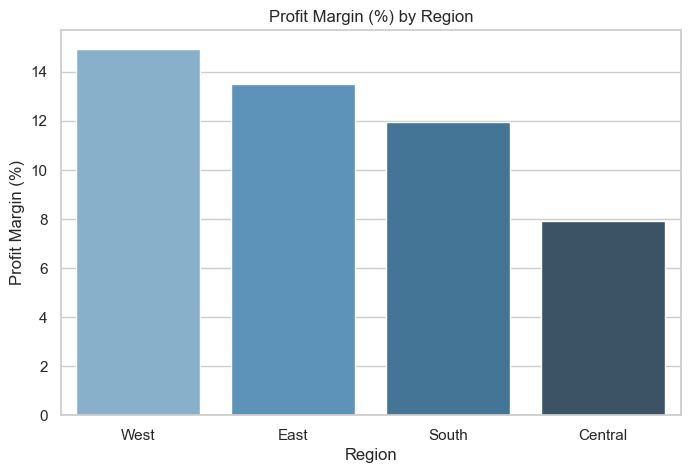

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_region, x="Region", y="Profit_Margin_Percentage", palette="Blues_d")
plt.title("Profit Margin (%) by Region")
plt.ylabel("Profit Margin (%)")
plt.savefig("Profit Margin (%) by Region")
plt.show()

## Visualization 3: Segment-wise Sales Distribution

A pie chart to show how total sales are divided among different customer segments.


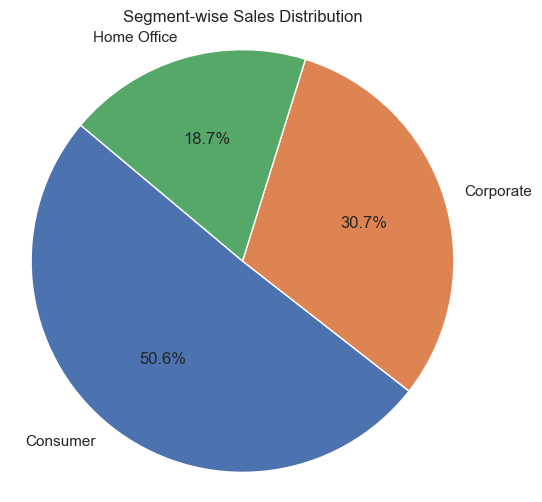

In [47]:
plt.figure(figsize=(6, 6))
plt.pie(df_segment["Total_Sales"], labels=df_segment["Segment"], autopct='%1.1f%%', startangle=140)
plt.title("Segment-wise Sales Distribution")
plt.axis("equal")
plt.savefig("Segment-wise Sales Distribution")
plt.show()

##  Visualization 4: Monthly Sales Trend by Category

A line plot to visualize monthly sales trends for each category. Helps identify seasonal patterns or growth over time.


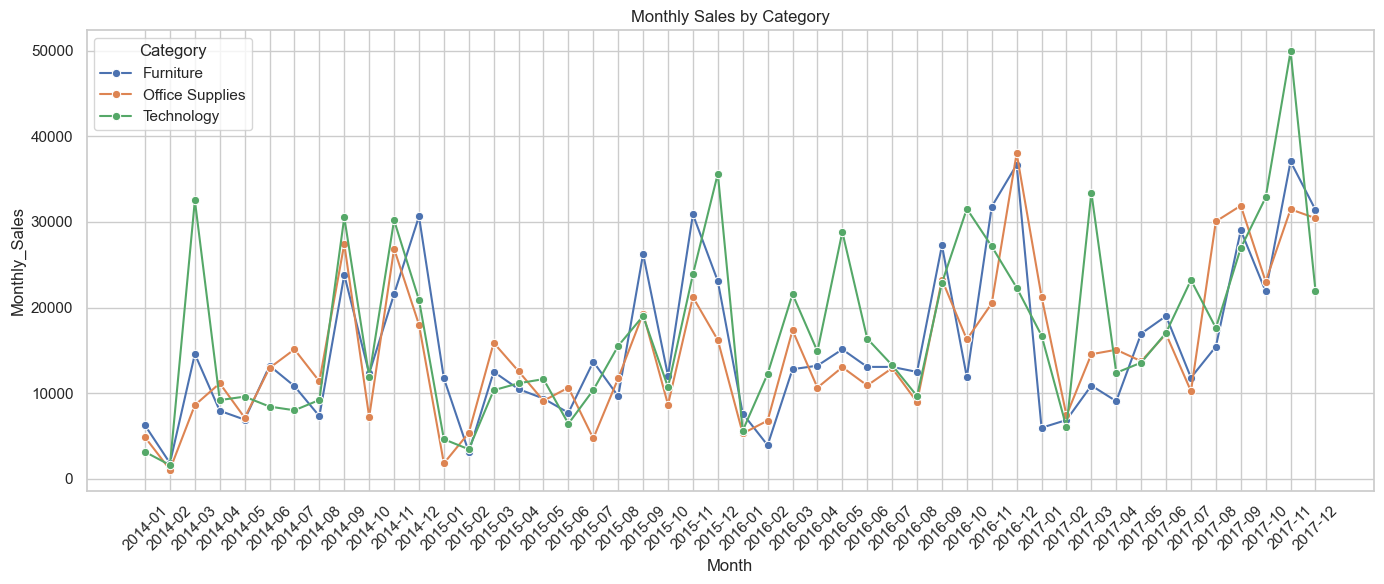

In [48]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_monthly, x="Month", y="Monthly_Sales", hue="Category", marker="o")
plt.title("Monthly Sales by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Monthly Sales by Category")
plt.show()

## Visualization 5: Sales vs. Profit Difference by State

This horizontal bar chart highlights states where there's a large gap between sales and profit, indicating possible operational inefficiencies.


C:\Users\soura\AppData\Local\Temp\ipykernel_11172\2820010913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_state, y="State", x="Sales_To_Profit_Difference", palette="coolwarm")


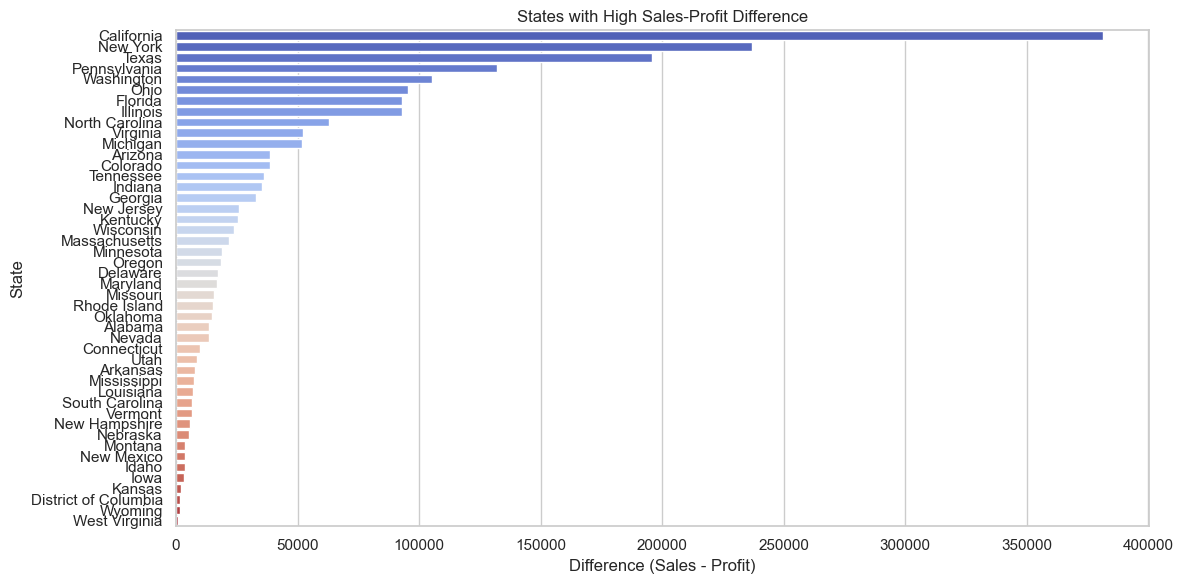

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_state, y="State", x="Sales_To_Profit_Difference", palette="coolwarm")
plt.title("States with High Sales-Profit Difference")
plt.xlabel("Difference (Sales - Profit)")
plt.tight_layout()
plt.savefig("States with High Sales-Profit Difference")
plt.show()

In [51]:
conn.close()

#  Conclusion

Through this project, we successfully:

- Cleaned and prepared sales data
- Loaded the dataset into an SQLite database
- Executed powerful SQL queries for business insights
- Visualized key metrics using clear and informative charts

This workflow demonstrates how Python and SQL can be used together effectively for data analysis and business intelligence.

---
